In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter("ignore")

In [2]:
dataset = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
dataset.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
dataset.shape

(270, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
dataset.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [7]:
dataset.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

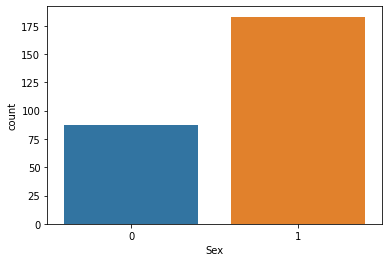

In [8]:
sns.countplot(x="Sex",data=dataset)

In [9]:
dataset.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [10]:
dataset["Heart Disease"] = LabelEncoder().fit_transform(dataset["Heart Disease"])

In [11]:
dataset.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


Heart Disease 1 -----> Present


Heart Disease 0 -----> Absent

In [12]:
X = dataset.drop(columns="Heart Disease",axis=1)
Y = dataset["Heart Disease"]

In [13]:
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [14]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Heart Disease, dtype: int32

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [41]:
X_train.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7
22,43,1,4,115,303,0,0,181,0,1.2,2,0,3
196,58,0,4,100,248,0,2,122,0,1.0,2,0,3
110,55,0,4,180,327,0,1,117,1,3.4,2,0,3
12,44,1,3,140,235,0,2,180,0,0.0,1,0,3


In [42]:
X_test.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
64,63,1,1,145,233,1,2,150,0,2.3,3,0,6
135,46,0,3,142,177,0,2,160,1,1.4,3,0,3
153,64,0,4,130,303,0,0,122,0,2.0,2,2,3
189,70,1,3,160,269,0,0,112,1,2.9,2,1,7
253,51,1,3,110,175,0,0,123,0,0.6,1,0,3


In [43]:
Y_train.head()

5      0
22     0
196    0
110    1
12     0
Name: Heart Disease, dtype: int32

In [44]:
Y_test.head()

64     0
135    0
153    0
189    1
253    0
Name: Heart Disease, dtype: int32

In [45]:
X.shape,X_train.shape,X_test.shape

((270, 13), (216, 13), (54, 13))

In [46]:
model = LogisticRegression()

In [47]:
model.fit(X_train, Y_train)

LogisticRegression()

In [48]:
X_train_prediction = model.predict(X_train)
X_train_accuracy = accuracy_score(X_train_prediction, Y_train)

In [49]:
X_train_accuracy

0.8842592592592593

In [50]:
X_test_prediction = model.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction, Y_test)

In [51]:
X_test_accuracy

0.8333333333333334

In [52]:
model2 = GaussianNB()

In [53]:
model2.fit(X_train, Y_train)

GaussianNB()

In [54]:
X_test_prediction2 = model2.predict(X_test)
X_test_accuracy2 = accuracy_score(X_test_prediction2, Y_test)

In [55]:
X_test_accuracy2

0.7407407407407407

In [56]:
X_train_prediction2 = model2.predict(X_train)
X_train_accuracy2 = accuracy_score(X_train_prediction2, Y_train)

In [57]:
X_train_accuracy2

0.8796296296296297

In [58]:
model3 = RandomForestClassifier()

In [59]:
model3.fit(X_train,Y_train)

RandomForestClassifier()

In [60]:
X_train_prediction3 = model3.predict(X_train)
X_train_accuracy3 = accuracy_score(X_train_prediction3, Y_train)

In [61]:
X_train_accuracy3

1.0

In [62]:
X_test_prediction3 = model3.predict(X_test)
X_test_accuracy3 = accuracy_score(X_test_prediction3, Y_test)

In [63]:
X_test_accuracy3

0.8148148148148148

In [66]:
input_data = (32,0,0,120,150,0,0,10,0,2,0,2,2)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
prediction

if prediction[0]==0:
    print("The person does not have heart disease")
else:
    print("The person have heart disease")

The person have heart disease
